In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

# Import Binary Alpha Digits

In [2]:
import scipy.io
datafile = scipy.io.loadmat('../../data/binaryalphadigs.mat')

### Explore and Visualize

In [3]:
print(datafile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'dat', 'numclass', 'classlabels', 'classcounts'])


In [5]:
def plot_character(x, label, ax):
    ax.imshow(x, cmap='gray')
    ax.axis('off')
    #ax.set_title(label)

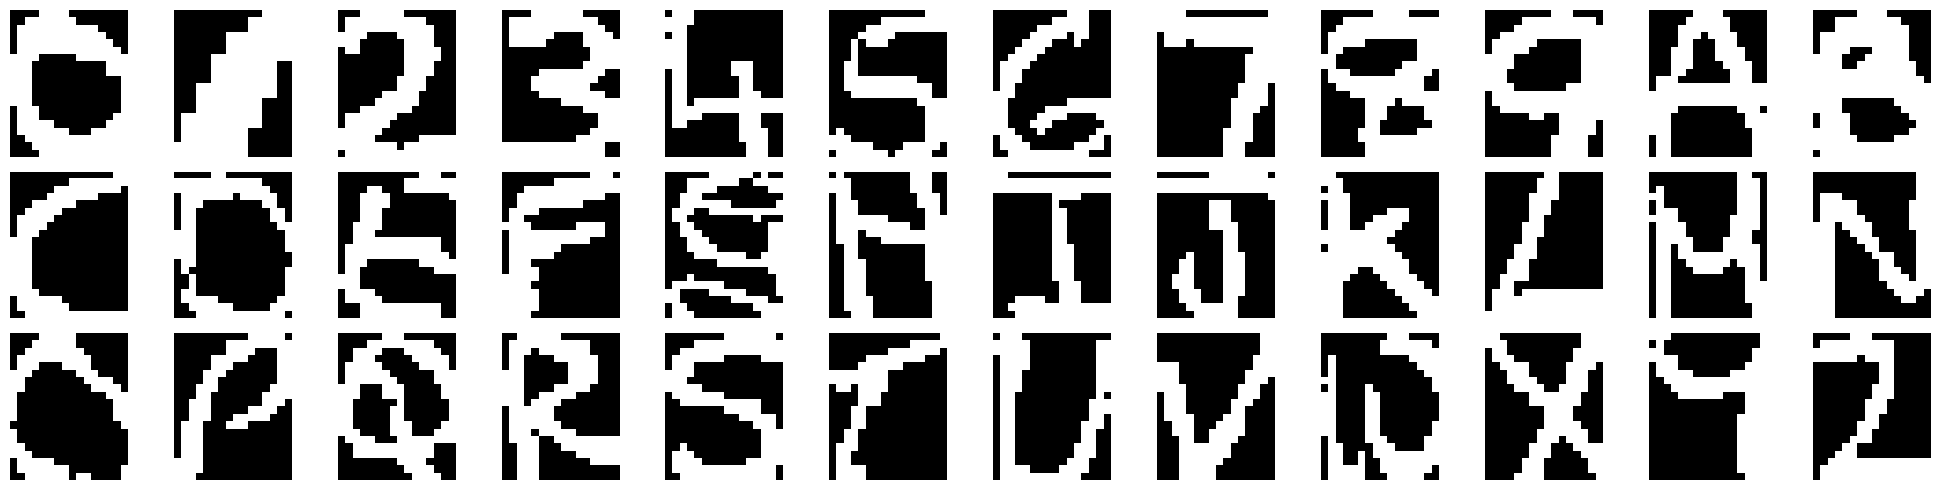

In [8]:
fig, axs = plt.subplots(3, 12, figsize=(20, 5))
for i in range(3):
    for j in range(12):
        index_to_plot = np.random.choice(range(39))
        plot_character(datafile['dat'][12*i+j, index_to_plot], datafile['classlabels'][0][12*i+j][0], axs[i, j])
plt.tight_layout()

# RBM

## Binary Alpha Digits

### RBM class, no adaptive learning rate

In [6]:
import sys
sys.path.append('..')

from rbm import RBM
from load_data import lire_alpha_digits

In [7]:
rbm_model = RBM(X=lire_alpha_digits(['A', '4', 'X']), q=256, use_adam=False)

Epoch 0: error = 0.4283
Epoch 500: error = 0.0384
Epoch 1000: error = 0.0171
Epoch 1500: error = 0.0098
Epoch 2000: error = 0.0081
Epoch 2500: error = 0.0057
Epoch 3000: error = 0.005
Epoch 3500: error = 0.0041
Epoch 4000: error = 0.0037
Epoch 4500: error = 0.0032
Epoch 4999: error = 0.0031


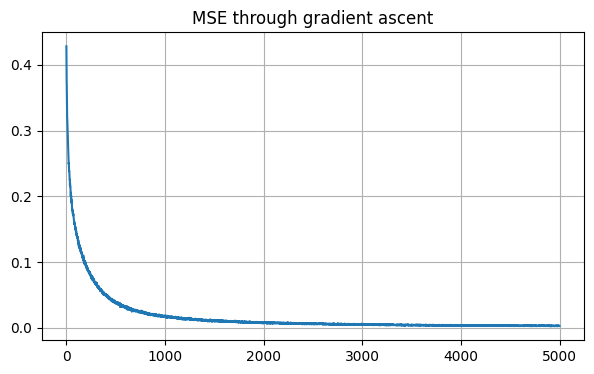

In [8]:
errors = rbm_model.train_RBM(5000, learning_rate=1e-3, batch_size=32, plot_errors=True)

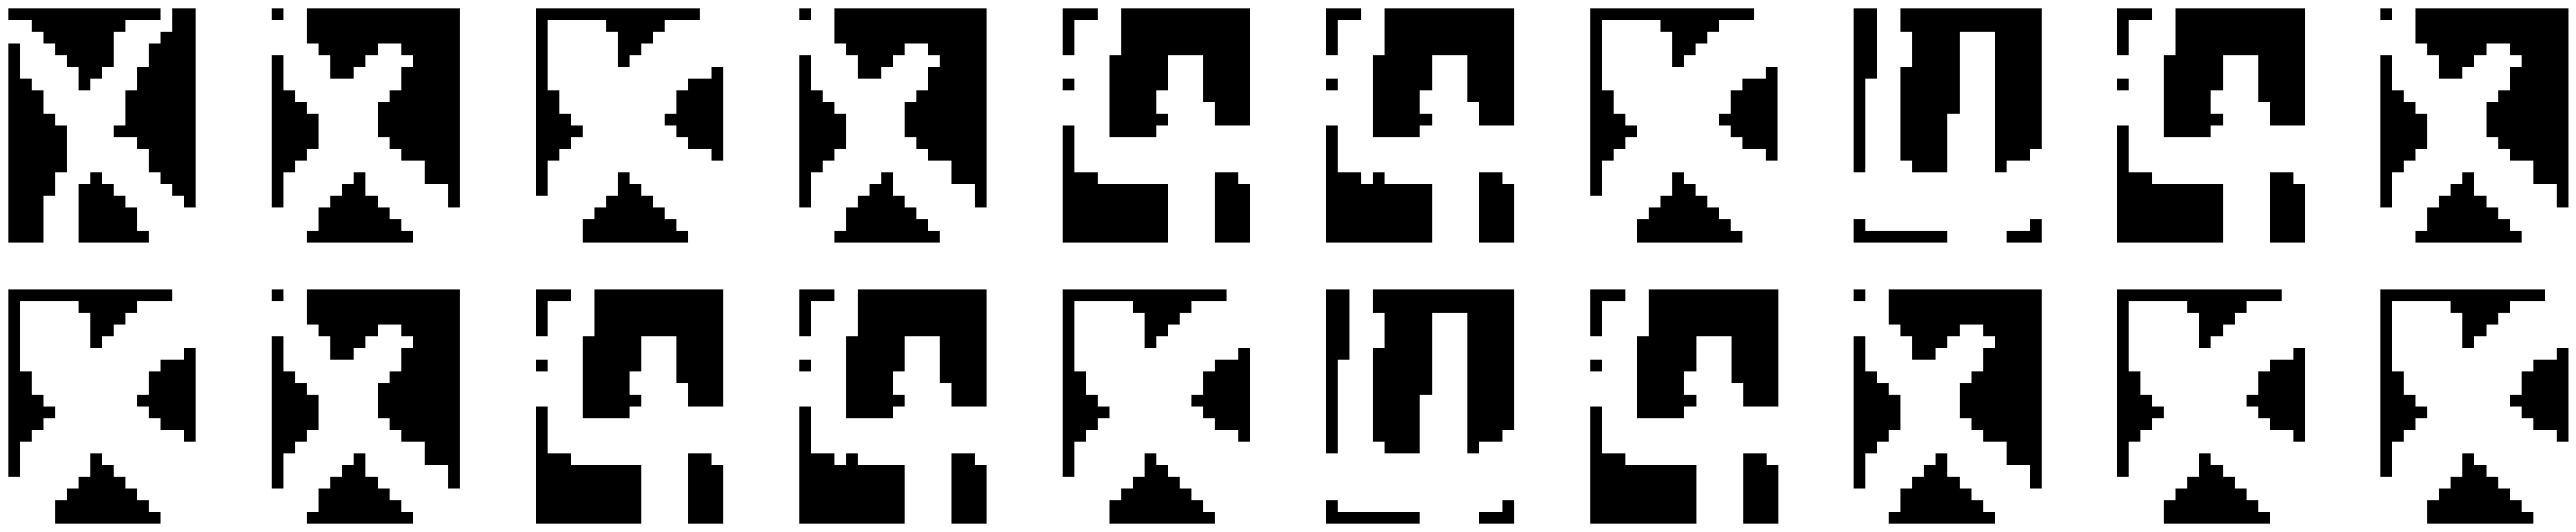

In [13]:
generated_images = rbm_model.generer_image_RBM(1000, 20, ncols=10)

## RBM, using ADAM

In [10]:
rbm_model = RBM(X=lire_alpha_digits(['A', '4', 'X']), q=256, use_adam=True)

Epoch 0: error = 0.4482
Epoch 500: error = 0.0546
Epoch 1000: error = 0.0188
Epoch 1500: error = 0.0084
Epoch 2000: error = 0.0044
Epoch 2500: error = 0.0031
Epoch 3000: error = 0.0016
Epoch 3500: error = 0.0013
Epoch 4000: error = 0.0011
Epoch 4500: error = 0.0011
Epoch 4999: error = 0.0006


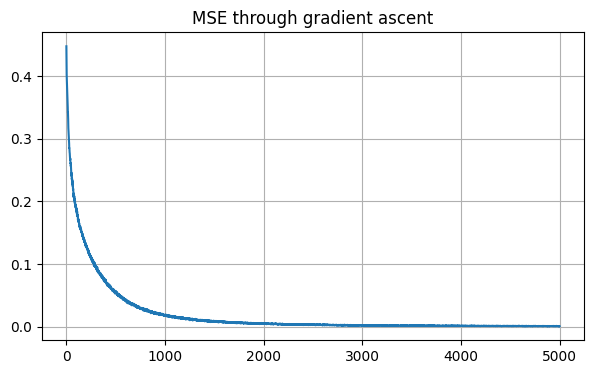

In [11]:
errors = rbm_model.train_RBM(5000, learning_rate=1e-3, batch_size=32, plot_errors=True)

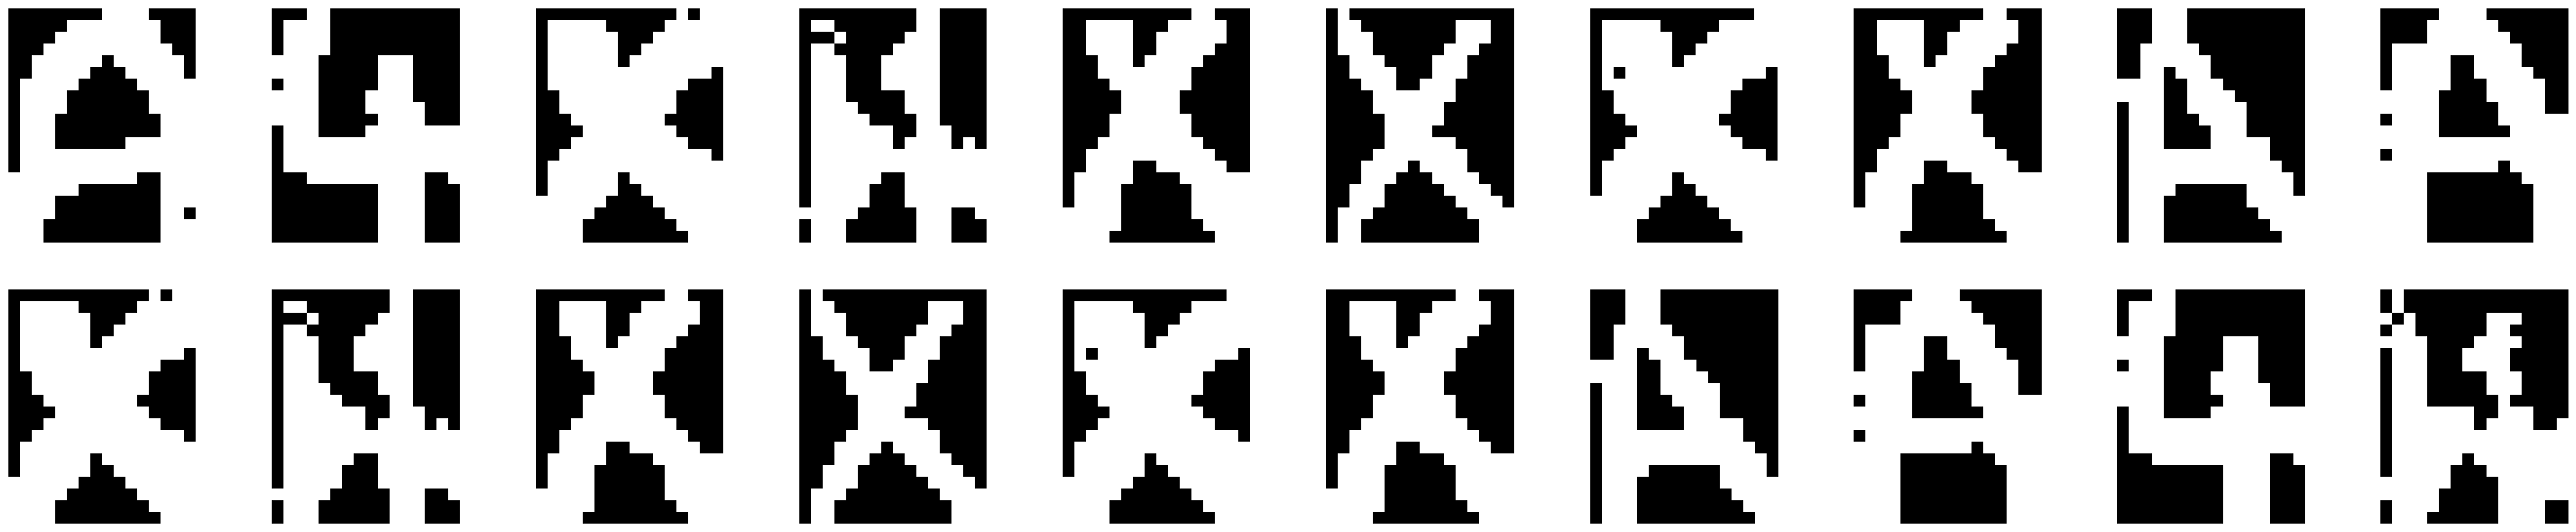

In [12]:
generated_images = rbm_model.generer_image_RBM(2000, 20, ncols=10)

In [16]:
from IPython.display import clear_output
l = list(range(15))
with tqdm(l, unit='digit') as r:
     for x in l:
        r.set_description(f'Digit {x}')
        import time
        time.sleep(0.5)
        time.sleep(1)
        r.set_postfix(loss=x)
        r.update(1)
        clear_output(wait=False)

Digit 14: 100%|██████████| 15/15 [00:22<00:00,  1.51s/digit, loss=14]


## MNIST

In [43]:
from load_data import load_mnist

In [44]:
X_train, y_train, X_test, y_test = load_mnist()

In [45]:
rbm_mnist = RBM(X=X_test, q=256)

Epoch 0: error = 0.1248
Epoch 100: error = 0.0318
Epoch 200: error = 0.0271
Epoch 300: error = 0.0247
Epoch 400: error = 0.0236
Epoch 500: error = 0.0226
Epoch 600: error = 0.022
Epoch 700: error = 0.0215
Epoch 800: error = 0.0212
Epoch 900: error = 0.0207
Epoch 999: error = 0.0205


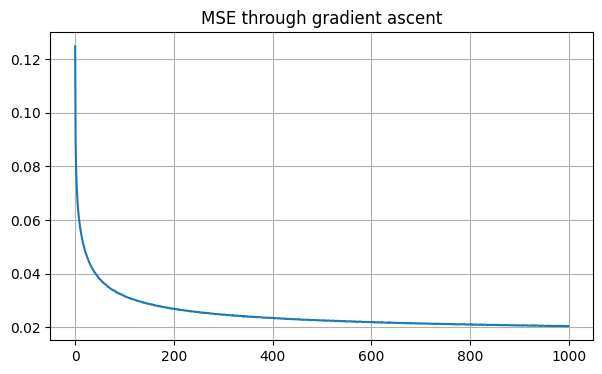

In [46]:
errors = rbm_mnist.train_RBM(1000, learning_rate=1e-3, batch_size=64, plot_errors=True)

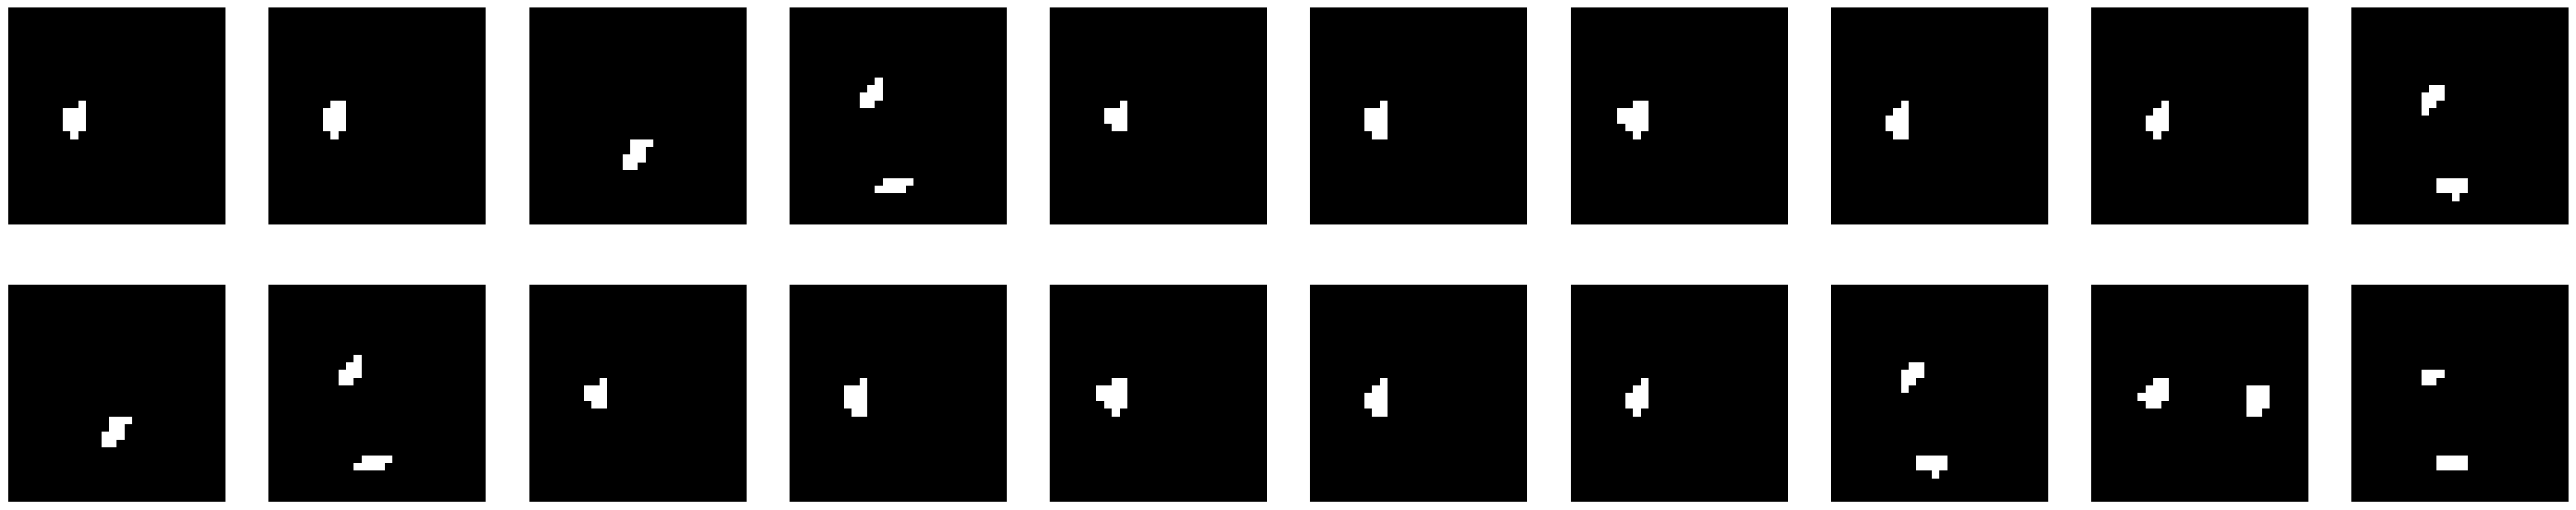

In [48]:
generated_images = rbm_mnist.generer_image_RBM(5000, 20, ncols=10, image_size=(28, 28))